In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

input_dir = '/data/user/sanyukta/rno_code/data'

In [32]:
station = 11
data = pd.read_csv(os.path.join(input_dir, f'pulser-data_st{station}.csv'))
excep_list = np.array([910, 912, 1787, 1794, 1801])
data.columns

Index(['station', 'run', 'fiber', 'att', 'freq_band', 'ch', 'snr', 'snr_sigma',
       'hilbert_snr', 'hilbert_snr_sigma', 'zenith', 'zenith_sigma', 'vpos',
       'vpos_sigma', 'vneg', 'vneg_sigma', 'integral', 'integral_sigma',
       'vdiff', 'noise', 'noise_sigma', 'hilbert_noise',
       'hilbert_noise_sigma'],
      dtype='object')

Run 1726, Band (150, 300)
Run 1726, Band (300, 450)
Run 1726, Band (450, 900)
Run 1726, Band (75, 900)
Run 1785, Band (150, 300)
Run 1785, Band (300, 450)
Run 1785, Band (450, 900)
Run 1785, Band (75, 900)
Run 1786, Band (150, 300)
Run 1786, Band (300, 450)
Run 1786, Band (450, 900)
Run 1786, Band (75, 900)
Run 1788, Band (150, 300)
Run 1788, Band (300, 450)
Run 1788, Band (450, 900)
Run 1788, Band (75, 900)
Run 1789, Band (150, 300)
Run 1789, Band (300, 450)
Run 1789, Band (450, 900)
Run 1789, Band (75, 900)
Run 1790, Band (150, 300)
Run 1790, Band (300, 450)
Run 1790, Band (450, 900)
Run 1790, Band (75, 900)
Run 1792, Band (150, 300)
Run 1792, Band (300, 450)
Run 1792, Band (450, 900)
Run 1792, Band (75, 900)
Run 1793, Band (150, 300)
Run 1793, Band (300, 450)
Run 1793, Band (450, 900)
Run 1793, Band (75, 900)


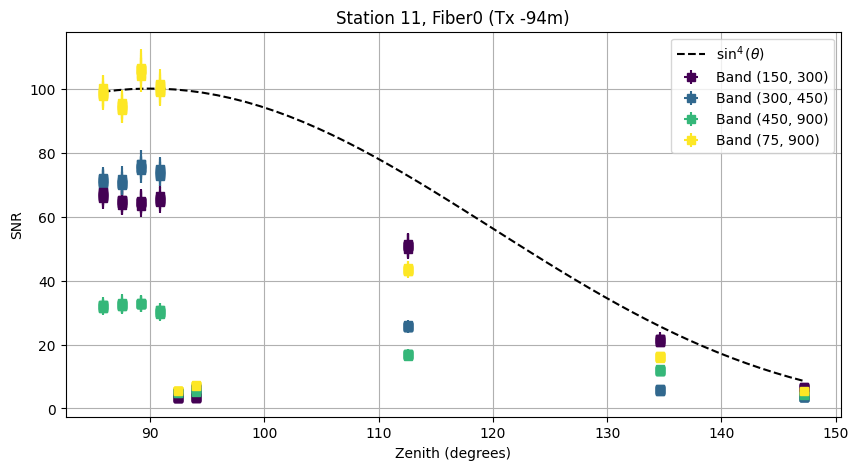

In [38]:
plt.figure(figsize=(10, 5))
plt.title(f'Station {station}, Fiber0 (Tx -94m)')
plt.xlabel('Zenith (degrees)')
plt.ylabel('SNR')
zenith = [85.85376217, 87.55363168, 89.17591253, 90.86012575, 94.02723792, 112.60373023, 134.65357249, 147.22940905, 92.46108741]
x = np.linspace(np.min(zenith),np.max(zenith))
plt.plot(x, 100*np.sin(np.radians(x))**4, color='black', label=r'$\sin^4(\theta)$', ls='--')

i = 0
for run in np.unique(data['run']):
    if run in excep_list:
        continue
    run_data = data[data['run'] == run]
    if run_data['fiber'].values[0]:
        continue
    if run_data['att'].values[0]:
        continue
    for band, color in zip(np.unique(run_data['freq_band']), plt.cm.viridis(np.linspace(0, 1, len(np.unique(run_data['freq_band']))))):
        print(f'Run {run}, Band {band}')
        band_data = run_data[run_data['freq_band'] == band]
        plt.errorbar(band_data['zenith'], band_data['snr'], xerr=band_data['zenith_sigma'],
                     yerr=band_data['snr_sigma'], label=f'Band {band}', marker='s', linestyle='None', color=color)
    if not i:
        plt.legend()
        i = 1
plt.grid()
# plt.xlim(110,)